# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras` (that is in fact embedded inside a larger library called `tensorflow`, but we will not discuss `tensorflow` in this course).
You should visit [`keras` webpage](https://www.tensorflow.org/guide/keras/overview) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import keras_core as keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

Using TensorFlow backend


**1. Define layers, and add them one by one to the model**


In [2]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

2023-07-18 15:04:52.751766: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-18 15:04:52.751785: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-07-18 15:04:52.751789: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-07-18 15:04:52.751822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 15:04:52.751837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [3]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [4]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [5]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [6]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
x_train, x_test, y_train, y_test = prepare_boston()

In [8]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [9]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - loss: 0.1185 - 198ms/epoch - 40ms/step
Epoch 2/10
5/5 - 0s - loss: 0.0845 - 15ms/epoch - 3ms/step
Epoch 3/10
5/5 - 0s - loss: 0.0691 - 22ms/epoch - 4ms/step
Epoch 4/10
5/5 - 0s - loss: 0.0626 - 16ms/epoch - 3ms/step
Epoch 5/10


2023-07-18 15:04:53.581667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 - 0s - loss: 0.0568 - 24ms/epoch - 5ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0553 - 18ms/epoch - 4ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0540 - 18ms/epoch - 4ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0529 - 16ms/epoch - 3ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0517 - 18ms/epoch - 4ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0515 - 27ms/epoch - 5ms/step


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [10]:
import tensorflow as tf

x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


2023-07-18 15:04:54.439331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 0.6327 - accuracy: 0.8415 - 4s/epoch - 6ms/step
Epoch 2/10
600/600 - 4s - loss: 0.3484 - accuracy: 0.9045 - 4s/epoch - 6ms/step
Epoch 3/10
600/600 - 4s - loss: 0.3107 - accuracy: 0.9143 - 4s/epoch - 6ms/step
Epoch 4/10
600/600 - 4s - loss: 0.2932 - accuracy: 0.9182 - 4s/epoch - 6ms/step
Epoch 5/10
600/600 - 4s - loss: 0.2828 - accuracy: 0.9213 - 4s/epoch - 6ms/step
Epoch 6/10
600/600 - 4s - loss: 0.2756 - accuracy: 0.9228 - 4s/epoch - 6ms/step
Epoch 7/10
600/600 - 4s - loss: 0.2695 - accuracy: 0.9249 - 4s/epoch - 6ms/step
Epoch 8/10
600/600 - 4s - loss: 0.2659 - accuracy: 0.9257 - 4s/epoch - 6ms/step
Epoch 9/10
600/600 - 4s - loss: 0.2621 - accuracy: 0.9273 - 4s/epoch - 6ms/step
Epoch 10/10
600/600 - 4s - loss: 0.2596 - accuracy: 0.9280 - 4s/epoch - 6ms/step


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [11]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


2023-07-18 15:05:31.437644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 0.3999 - accuracy: 0.8867 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 4s - loss: 0.2925 - accuracy: 0.9185 - 4s/epoch - 6ms/step
Epoch 3/10
600/600 - 4s - loss: 0.2873 - accuracy: 0.9197 - 4s/epoch - 6ms/step
Epoch 4/10
600/600 - 4s - loss: 0.2870 - accuracy: 0.9207 - 4s/epoch - 6ms/step
Epoch 5/10
600/600 - 4s - loss: 0.2850 - accuracy: 0.9218 - 4s/epoch - 6ms/step
Epoch 6/10
600/600 - 4s - loss: 0.2856 - accuracy: 0.9208 - 4s/epoch - 6ms/step
Epoch 7/10
600/600 - 4s - loss: 0.2900 - accuracy: 0.9201 - 4s/epoch - 6ms/step
Epoch 8/10
600/600 - 4s - loss: 0.2907 - accuracy: 0.9197 - 4s/epoch - 6ms/step
Epoch 9/10
600/600 - 4s - loss: 0.2949 - accuracy: 0.9194 - 4s/epoch - 6ms/step
Epoch 10/10
600/600 - 4s - loss: 0.2946 - accuracy: 0.9192 - 4s/epoch - 6ms/step


In [12]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


2023-07-18 15:06:09.346241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 0.4101 - accuracy: 0.8843 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 4s - loss: 0.7182 - accuracy: 0.8594 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 1.7705 - accuracy: 0.8257 - 4s/epoch - 7ms/step
Epoch 4/10
600/600 - 4s - loss: 3.3533 - accuracy: 0.8096 - 4s/epoch - 7ms/step
Epoch 5/10
600/600 - 4s - loss: 4.5909 - accuracy: 0.8097 - 4s/epoch - 7ms/step
Epoch 6/10
600/600 - 4s - loss: 5.1832 - accuracy: 0.8193 - 4s/epoch - 6ms/step
Epoch 7/10
600/600 - 4s - loss: 7.4762 - accuracy: 0.8089 - 4s/epoch - 6ms/step
Epoch 8/10
600/600 - 4s - loss: 8.9257 - accuracy: 0.8101 - 4s/epoch - 6ms/step
Epoch 9/10
600/600 - 4s - loss: 10.8633 - accuracy: 0.8069 - 4s/epoch - 6ms/step
Epoch 10/10
600/600 - 4s - loss: 12.5151 - accuracy: 0.8060 - 4s/epoch - 6ms/step


In [13]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


2023-07-18 15:06:47.956243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 3.2867 - accuracy: 0.7675 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 4s - loss: 61.4468 - accuracy: 0.5022 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 240.2776 - accuracy: 0.4256 - 4s/epoch - 6ms/step
Epoch 4/10
600/600 - 4s - loss: 470.2189 - accuracy: 0.4033 - 4s/epoch - 7ms/step
Epoch 5/10
600/600 - 4s - loss: 861.1790 - accuracy: 0.3809 - 4s/epoch - 6ms/step
Epoch 6/10
600/600 - 4s - loss: 1317.3137 - accuracy: 0.3826 - 4s/epoch - 6ms/step
Epoch 7/10
600/600 - 4s - loss: 1902.0969 - accuracy: 0.3650 - 4s/epoch - 6ms/step
Epoch 8/10
600/600 - 4s - loss: 2200.2087 - accuracy: 0.3810 - 4s/epoch - 7ms/step
Epoch 9/10
600/600 - 4s - loss: 3314.5220 - accuracy: 0.3549 - 4s/epoch - 6ms/step
Epoch 10/10
600/600 - 7s - loss: 3921.3835 - accuracy: 0.3596 - 7s/epoch - 11ms/step


In [14]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [15]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10


2023-07-18 15:07:32.972700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 20s - loss: 0.3844 - accuracy: 0.8917 - 20s/epoch - 33ms/step
Epoch 2/10
600/600 - 15s - loss: 0.2969 - accuracy: 0.9171 - 15s/epoch - 24ms/step
Epoch 3/10
600/600 - 16s - loss: 0.2886 - accuracy: 0.9197 - 16s/epoch - 26ms/step
Epoch 4/10
600/600 - 12s - loss: 0.2909 - accuracy: 0.9196 - 12s/epoch - 20ms/step
Epoch 5/10
600/600 - 14s - loss: 0.2893 - accuracy: 0.9202 - 14s/epoch - 24ms/step
Epoch 6/10
600/600 - 14s - loss: 0.2959 - accuracy: 0.9182 - 14s/epoch - 23ms/step
Epoch 7/10
600/600 - 12s - loss: 0.2974 - accuracy: 0.9181 - 12s/epoch - 20ms/step
Epoch 8/10
600/600 - 14s - loss: 0.2997 - accuracy: 0.9186 - 14s/epoch - 24ms/step
Epoch 9/10
600/600 - 11s - loss: 0.3065 - accuracy: 0.9175 - 11s/epoch - 18ms/step
Epoch 10/10
600/600 - 9s - loss: 0.3106 - accuracy: 0.9160 - 9s/epoch - 15ms/step


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [16]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10


2023-07-18 15:09:49.040656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:09:53.885325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 7s - loss: 0.5627 - accuracy: 0.8530 - val_loss: 1.1184 - val_accuracy: 0.8121 - 7s/epoch - 16ms/step
Epoch 2/10
420/420 - 11s - loss: 12.4700 - accuracy: 0.6704 - val_loss: 26.5088 - val_accuracy: 0.6374 - 11s/epoch - 27ms/step
Epoch 3/10
420/420 - 7s - loss: 61.6038 - accuracy: 0.5824 - val_loss: 63.4268 - val_accuracy: 0.6259 - 7s/epoch - 17ms/step
Epoch 4/10
420/420 - 10s - loss: 147.6133 - accuracy: 0.5255 - val_loss: 279.4104 - val_accuracy: 0.5297 - 10s/epoch - 24ms/step
Epoch 5/10
420/420 - 6s - loss: 301.8796 - accuracy: 0.4909 - val_loss: 478.7811 - val_accuracy: 0.4696 - 6s/epoch - 14ms/step
Epoch 6/10
420/420 - 9s - loss: 470.1780 - accuracy: 0.4727 - val_loss: 469.8425 - val_accuracy: 0.4704 - 9s/epoch - 21ms/step
Epoch 7/10
420/420 - 11s - loss: 775.1038 - accuracy: 0.4475 - val_loss: 611.5872 - val_accuracy: 0.5075 - 11s/epoch - 25ms/step
Epoch 8/10
420/420 - 8s - loss: 1190.0272 - accuracy: 0.4348 - val_loss: 1314.6913 - val_accuracy: 0.4464 - 8s/epoch - 20ms/

In [17]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10


2023-07-18 15:11:24.452838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:11:28.802255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 6s - loss: 0.4158 - accuracy: 0.8830 - val_loss: 0.3160 - val_accuracy: 0.9119 - 6s/epoch - 15ms/step
Epoch 2/10
420/420 - 8s - loss: 0.2992 - accuracy: 0.9162 - val_loss: 0.2908 - val_accuracy: 0.9213 - 8s/epoch - 20ms/step
Epoch 3/10
420/420 - 10s - loss: 0.2880 - accuracy: 0.9198 - val_loss: 0.2979 - val_accuracy: 0.9191 - 10s/epoch - 25ms/step
Epoch 4/10
420/420 - 10s - loss: 0.2836 - accuracy: 0.9210 - val_loss: 0.3029 - val_accuracy: 0.9176 - 10s/epoch - 25ms/step
Epoch 5/10
420/420 - 11s - loss: 0.2808 - accuracy: 0.9214 - val_loss: 0.3123 - val_accuracy: 0.9140 - 11s/epoch - 26ms/step
Epoch 6/10
420/420 - 9s - loss: 0.2853 - accuracy: 0.9205 - val_loss: 0.3017 - val_accuracy: 0.9202 - 9s/epoch - 21ms/step
Epoch 7/10
420/420 - 6s - loss: 0.2834 - accuracy: 0.9222 - val_loss: 0.3265 - val_accuracy: 0.9143 - 6s/epoch - 14ms/step
Epoch 8/10
420/420 - 5s - loss: 0.2868 - accuracy: 0.9195 - val_loss: 0.3221 - val_accuracy: 0.9155 - 5s/epoch - 12ms/step
Epoch 9/10
420/420 - 

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [18]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2023-07-18 15:12:40.268811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:12:44.641712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 7s - loss: 0.4388 - accuracy: 0.8739 - val_loss: 0.3295 - val_accuracy: 0.9077 - 7s/epoch - 17ms/step
Epoch 2/10
420/420 - 10s - loss: 0.3978 - accuracy: 0.8942 - val_loss: 0.4355 - val_accuracy: 0.8909 - 10s/epoch - 23ms/step
Epoch 3/10
420/420 - 6s - loss: 0.7901 - accuracy: 0.8525 - val_loss: 1.0985 - val_accuracy: 0.8367 - 6s/epoch - 15ms/step
Epoch 4/10
420/420 - 6s - loss: 1.5256 - accuracy: 0.8287 - val_loss: 1.8342 - val_accuracy: 0.8346 - 6s/epoch - 14ms/step
Epoch 5/10
420/420 - 6s - loss: 2.2124 - accuracy: 0.8213 - val_loss: 3.6359 - val_accuracy: 0.7562 - 6s/epoch - 13ms/step
Epoch 6/10
420/420 - 6s - loss: 3.1481 - accuracy: 0.8100 - val_loss: 3.4864 - val_accuracy: 0.8183 - 6s/epoch - 13ms/step
Epoch 7/10
420/420 - 6s - loss: 4.2253 - accuracy: 0.8088 - val_loss: 3.7300 - val_accuracy: 0.8356 - 6s/epoch - 13ms/step
Epoch 8/10
420/420 - 6s - loss: 5.0158 - accuracy: 0.8107 - val_loss: 5.1326 - val_accuracy: 0.8338 - 6s/epoch - 15ms/step
Epoch 9/10
420/420 - 6s -

In [19]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2023-07-18 15:13:43.722798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:13:49.473591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 9s - loss: 1.2914 - accuracy: 0.6394 - val_loss: 0.6839 - val_accuracy: 0.8322 - 9s/epoch - 22ms/step
Epoch 2/10
420/420 - 10s - loss: 0.5714 - accuracy: 0.8498 - val_loss: 0.4660 - val_accuracy: 0.8715 - 10s/epoch - 23ms/step
Epoch 3/10
420/420 - 5s - loss: 0.4440 - accuracy: 0.8775 - val_loss: 0.4023 - val_accuracy: 0.8866 - 5s/epoch - 12ms/step
Epoch 4/10
420/420 - 5s - loss: 0.3947 - accuracy: 0.8892 - val_loss: 0.3701 - val_accuracy: 0.8932 - 5s/epoch - 12ms/step
Epoch 5/10
420/420 - 5s - loss: 0.3685 - accuracy: 0.8967 - val_loss: 0.3524 - val_accuracy: 0.8992 - 5s/epoch - 12ms/step
Epoch 6/10
420/420 - 5s - loss: 0.3519 - accuracy: 0.9004 - val_loss: 0.3415 - val_accuracy: 0.9012 - 5s/epoch - 12ms/step
Epoch 7/10
420/420 - 6s - loss: 0.3400 - accuracy: 0.9039 - val_loss: 0.3324 - val_accuracy: 0.9044 - 6s/epoch - 13ms/step
Epoch 8/10
420/420 - 6s - loss: 0.3313 - accuracy: 0.9060 - val_loss: 0.3271 - val_accuracy: 0.9078 - 6s/epoch - 15ms/step
Epoch 9/10
420/420 - 7s -

In [20]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2023-07-18 15:14:47.751830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:14:52.637360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 8s - loss: 0.4434 - accuracy: 0.8739 - val_loss: 0.3167 - val_accuracy: 0.9134 - 8s/epoch - 20ms/step
Epoch 2/10
420/420 - 9s - loss: 0.3776 - accuracy: 0.8965 - val_loss: 0.4251 - val_accuracy: 0.8956 - 9s/epoch - 22ms/step
Epoch 3/10
420/420 - 6s - loss: 0.6625 - accuracy: 0.8615 - val_loss: 0.7213 - val_accuracy: 0.8737 - 6s/epoch - 15ms/step
Epoch 4/10
420/420 - 6s - loss: 1.1661 - accuracy: 0.8375 - val_loss: 1.2029 - val_accuracy: 0.8516 - 6s/epoch - 15ms/step
Epoch 5/10
420/420 - 6s - loss: 1.7896 - accuracy: 0.8262 - val_loss: 1.8919 - val_accuracy: 0.8503 - 6s/epoch - 13ms/step
Epoch 6/10
420/420 - 6s - loss: 2.4814 - accuracy: 0.8244 - val_loss: 2.4888 - val_accuracy: 0.8252 - 6s/epoch - 14ms/step
Epoch 7/10
420/420 - 7s - loss: 3.3880 - accuracy: 0.8137 - val_loss: 4.4639 - val_accuracy: 0.8011 - 7s/epoch - 17ms/step
Epoch 8/10
420/420 - 5s - loss: 4.0428 - accuracy: 0.8138 - val_loss: 4.7581 - val_accuracy: 0.8102 - 5s/epoch - 13ms/step
Epoch 9/10
420/420 - 6s - l

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [21]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2023-07-18 15:15:56.609848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:16:00.771811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 6s - loss: 0.9960 - accuracy: 0.7246 - val_loss: 0.4592 - val_accuracy: 0.8773 - 6s/epoch - 15ms/step
Epoch 2/10
420/420 - 6s - loss: 0.3992 - accuracy: 0.8900 - val_loss: 0.3511 - val_accuracy: 0.9009 - 6s/epoch - 14ms/step
Epoch 3/10
420/420 - 6s - loss: 0.3372 - accuracy: 0.9060 - val_loss: 0.3214 - val_accuracy: 0.9084 - 6s/epoch - 13ms/step
Epoch 4/10
420/420 - 5s - loss: 0.3143 - accuracy: 0.9121 - val_loss: 0.3098 - val_accuracy: 0.9124 - 5s/epoch - 13ms/step
Epoch 5/10
420/420 - 5s - loss: 0.3019 - accuracy: 0.9161 - val_loss: 0.3062 - val_accuracy: 0.9133 - 5s/epoch - 13ms/step
Epoch 6/10
420/420 - 5s - loss: 0.2931 - accuracy: 0.9180 - val_loss: 0.3004 - val_accuracy: 0.9165 - 5s/epoch - 13ms/step
Epoch 7/10
420/420 - 5s - loss: 0.2872 - accuracy: 0.9195 - val_loss: 0.2990 - val_accuracy: 0.9149 - 5s/epoch - 13ms/step
Epoch 8/10
420/420 - 6s - loss: 0.2830 - accuracy: 0.9214 - val_loss: 0.2949 - val_accuracy: 0.9188 - 6s/epoch - 15ms/step
Epoch 9/10
420/420 - 5s - l

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [22]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2023-07-18 15:16:49.818342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:16:52.286589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 - 4s - loss: 0.4340 - accuracy: 0.8737 - val_loss: 0.3232 - val_accuracy: 0.9094 - 4s/epoch - 8ms/step
Epoch 2/10
420/420 - 3s - loss: 0.3951 - accuracy: 0.8928 - val_loss: 0.4569 - val_accuracy: 0.8856 - 3s/epoch - 8ms/step
Epoch 3/10
420/420 - 3s - loss: 0.7120 - accuracy: 0.8583 - val_loss: 1.1132 - val_accuracy: 0.8256 - 3s/epoch - 8ms/step
Epoch 4/10
420/420 - 3s - loss: 1.1761 - accuracy: 0.8379 - val_loss: 1.1128 - val_accuracy: 0.8519 - 3s/epoch - 8ms/step
Epoch 5/10
420/420 - 3s - loss: 1.8677 - accuracy: 0.8256 - val_loss: 2.0594 - val_accuracy: 0.8442 - 3s/epoch - 8ms/step
Epoch 6/10
420/420 - 3s - loss: 2.7890 - accuracy: 0.8168 - val_loss: 2.0981 - val_accuracy: 0.8516 - 3s/epoch - 8ms/step
Epoch 7/10
420/420 - 3s - loss: 3.2955 - accuracy: 0.8180 - val_loss: 3.7898 - val_accuracy: 0.7926 - 3s/epoch - 8ms/step
Epoch 8/10
420/420 - 3s - loss: 3.9532 - accuracy: 0.8190 - val_loss: 6.2408 - val_accuracy: 0.7931 - 3s/epoch - 8ms/step
Epoch 9/10
420/420 - 3s - loss: 4.5

In [23]:
h.history

{'loss': [0.4340144097805023,
  0.3950565457344055,
  0.7119899392127991,
  1.1760776042938232,
  1.8676561117172241,
  2.789045572280884,
  3.295520544052124,
  3.9532318115234375,
  4.565883159637451,
  6.078786373138428],
 'accuracy': [0.8736904859542847,
  0.8928095102310181,
  0.8582857251167297,
  0.8379047513008118,
  0.8255714178085327,
  0.8167856931686401,
  0.8180238008499146,
  0.8190000057220459,
  0.8200713992118835,
  0.8042142987251282],
 'val_loss': [0.3232044279575348,
  0.4568624794483185,
  1.1131997108459473,
  1.1127514839172363,
  2.0594043731689453,
  2.0980639457702637,
  3.789783477783203,
  6.2407684326171875,
  4.714596271514893,
  6.882626533508301],
 'val_accuracy': [0.9094444513320923,
  0.8855555653572083,
  0.8255555629730225,
  0.85188889503479,
  0.8442222476005554,
  0.8515555262565613,
  0.7926111221313477,
  0.793055534362793,
  0.8286111354827881,
  0.8097777962684631]}

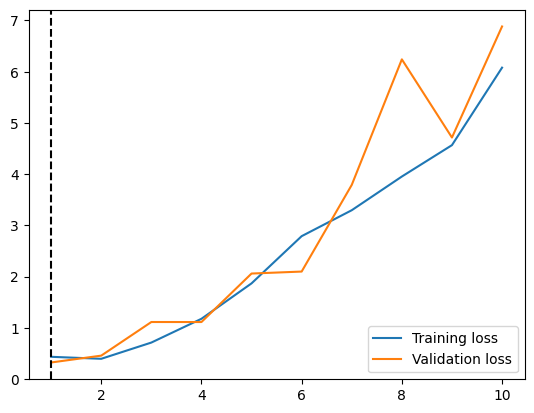

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.hdf5` on your project. Only record models if validation loss is lower than for all previous models.

In [25]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.hdf5", save_best_only=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10


2023-07-18 15:17:23.273218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:17:26.807537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 0.4112 - accuracy: 0.8830 - val_loss: 0.3762 - val_accuracy: 0.8969 - 4s/epoch - 7ms/step
Epoch 2/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


600/600 - 4s - loss: 0.7539 - accuracy: 0.8554 - val_loss: 1.1140 - val_accuracy: 0.8552 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 1.6811 - accuracy: 0.8291 - val_loss: 2.1969 - val_accuracy: 0.8292 - 4s/epoch - 7ms/step
Epoch 4/10
600/600 - 4s - loss: 2.8393 - accuracy: 0.8167 - val_loss: 5.3911 - val_accuracy: 0.7633 - 4s/epoch - 7ms/step
Epoch 5/10
600/600 - 4s - loss: 4.1086 - accuracy: 0.8154 - val_loss: 3.4884 - val_accuracy: 0.8280 - 4s/epoch - 7ms/step
Epoch 6/10
600/600 - 4s - loss: 5.5506 - accuracy: 0.8059 - val_loss: 9.3205 - val_accuracy: 0.7605 - 4s/epoch - 7ms/step
Epoch 7/10
600/600 - 4s - loss: 7.2047 - accuracy: 0.8056 - val_loss: 12.3705 - val_accuracy: 0.7766 - 4s/epoch - 7ms/step
Epoch 8/10
600/600 - 4s - loss: 8.4527 - accuracy: 0.8127 - val_loss: 10.1331 - val_accuracy: 0.8124 - 4s/epoch - 7ms/step
Epoch 9/10
600/600 - 4s - loss: 10.7294 - accuracy: 0.8031 - val_loss: 9.7861 - val_accuracy: 0.8164 - 4s/epoch - 7ms/step
Epoch 10/10
600/600 - 4s - loss:

Use the code below to check that a model has been saved:

In [26]:
%ls -alh "model.hdf5"

-rw-r--r--@ 1 rtavenar  staff   1.4M Jul 18 15:17 model.hdf5


In [27]:
model.evaluate(x_test, y_test)

  9/313 [..............................] - ETA: 2s - loss: 11.3925 - accuracy: 0.8507 

2023-07-18 15:18:03.199180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 14.9235 - accuracy: 0.8145


[14.923468589782715, 0.8144999742507935]

In [28]:
model.load_weights("model.hdf5")
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3762 - accuracy: 0.8969


[0.3762185871601105, 0.8968999981880188]

## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://keras.io/api/layers/regularizers/) could help.

In [29]:
from keras.regularizers import l2

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10


2023-07-18 15:18:07.662508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:18:13.011587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 - 7s - loss: 0.6883 - accuracy: 0.8755 - val_loss: 0.6086 - val_accuracy: 0.8989 - 7s/epoch - 14ms/step
Epoch 2/10
480/480 - 6s - loss: 0.9260 - accuracy: 0.8736 - val_loss: 1.3183 - val_accuracy: 0.8687 - 6s/epoch - 13ms/step
Epoch 3/10
480/480 - 6s - loss: 2.4274 - accuracy: 0.8330 - val_loss: 3.7461 - val_accuracy: 0.8045 - 6s/epoch - 13ms/step
Epoch 4/10
480/480 - 6s - loss: 5.3449 - accuracy: 0.8067 - val_loss: 7.0752 - val_accuracy: 0.7932 - 6s/epoch - 13ms/step
Epoch 5/10
480/480 - 6s - loss: 9.0529 - accuracy: 0.7981 - val_loss: 10.0075 - val_accuracy: 0.8541 - 6s/epoch - 14ms/step
Epoch 6/10
480/480 - 7s - loss: 12.8131 - accuracy: 0.8051 - val_loss: 14.0437 - val_accuracy: 0.8389 - 7s/epoch - 14ms/step
Epoch 7/10
480/480 - 6s - loss: 17.2134 - accuracy: 0.8015 - val_loss: 18.8294 - val_accuracy: 0.8064 - 6s/epoch - 13ms/step
Epoch 8/10
480/480 - 6s - loss: 21.7229 - accuracy: 0.8013 - val_loss: 25.2550 - val_accuracy: 0.7806 - 6s/epoch - 13ms/step
Epoch 9/10
480/480 -

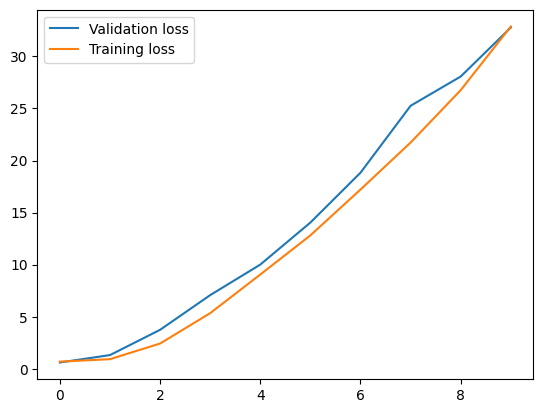

In [30]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://keras.io/api/layers/regularization_layers/dropout/) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [31]:
from keras.layers import Dropout

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10


2023-07-18 15:19:11.491772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:19:14.839582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 - 4s - loss: 0.5182 - accuracy: 0.8458 - val_loss: 0.3318 - val_accuracy: 0.9055 - 4s/epoch - 9ms/step
Epoch 2/10
480/480 - 4s - loss: 0.6983 - accuracy: 0.8456 - val_loss: 0.6077 - val_accuracy: 0.8814 - 4s/epoch - 8ms/step
Epoch 3/10
480/480 - 4s - loss: 1.4772 - accuracy: 0.8152 - val_loss: 1.1672 - val_accuracy: 0.8604 - 4s/epoch - 8ms/step
Epoch 4/10
480/480 - 4s - loss: 2.2404 - accuracy: 0.8096 - val_loss: 1.3620 - val_accuracy: 0.8736 - 4s/epoch - 8ms/step
Epoch 5/10
480/480 - 4s - loss: 3.0231 - accuracy: 0.8043 - val_loss: 1.7875 - val_accuracy: 0.8722 - 4s/epoch - 8ms/step
Epoch 6/10
480/480 - 4s - loss: 4.1288 - accuracy: 0.7950 - val_loss: 2.7396 - val_accuracy: 0.8588 - 4s/epoch - 8ms/step
Epoch 7/10
480/480 - 4s - loss: 4.6727 - accuracy: 0.7960 - val_loss: 3.1726 - val_accuracy: 0.8632 - 4s/epoch - 8ms/step
Epoch 8/10
480/480 - 4s - loss: 5.7093 - accuracy: 0.7906 - val_loss: 4.1192 - val_accuracy: 0.8450 - 4s/epoch - 8ms/step
Epoch 9/10
480/480 - 4s - loss: 6.5

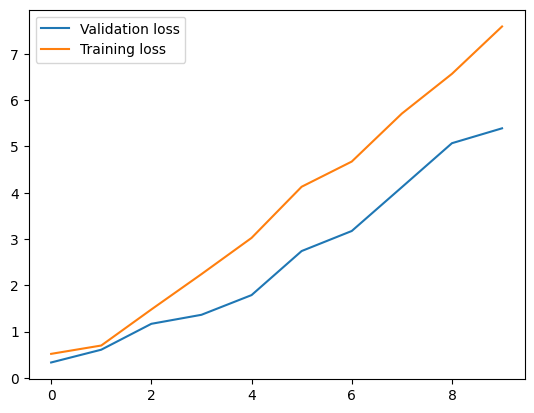

In [32]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [33]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100


2023-07-18 15:19:49.398559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:19:53.130851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 - 4s - loss: 0.4254 - accuracy: 0.8785 - val_loss: 0.3535 - val_accuracy: 0.8965 - 4s/epoch - 7ms/step
Epoch 2/100
600/600 - 4s - loss: 0.6915 - accuracy: 0.8566 - val_loss: 0.9613 - val_accuracy: 0.8579 - 4s/epoch - 7ms/step
Epoch 3/100
600/600 - 4s - loss: 1.9253 - accuracy: 0.8141 - val_loss: 1.8767 - val_accuracy: 0.8370 - 4s/epoch - 7ms/step
Epoch 4/100
600/600 - 4s - loss: 2.8833 - accuracy: 0.8126 - val_loss: 2.5009 - val_accuracy: 0.8386 - 4s/epoch - 7ms/step


In [34]:
model.evaluate(x_test, y_test)

 16/313 [>.............................] - ETA: 2s - loss: 0.3357 - accuracy: 0.8965

2023-07-18 15:20:06.230096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.3535 - accuracy: 0.8965


[0.3535313010215759, 0.8964999914169312]